# Центральная предельная теорема для экспоненциального распределения

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import sqrt
from math import exp
%matplotlib inline

Зададим экспоненциальное распределение с заданным параметром лямбда, посчитаем значения мат. ожидания и дисперсии и сравним их со значениями, посчитанными встроенными методами:

In [2]:
lamb = 5
expnt = sts.expon(scale = 1.0/lamb)

variance = (lamb*1.0)**(-2) #дисперсия 
expect = (lamb*1.0)**(-1) #мат ожидание

print expnt.var()
print variance
print expnt.expect()
print expect

0.04
0.04
0.2
0.2


Создадим выборку из 1000 случайных чисел этого распределения, построим гистограмму этой выборки и теоретический график плотности распределения:

In [3]:
array = expnt.rvs(size = 1000)

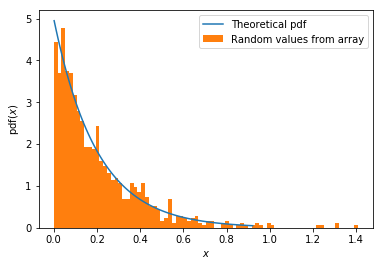

In [5]:
xplot = np.linspace(expnt.ppf(0.01),expnt.ppf(0.99), 100)
yplot = expnt.pdf(xplot)

plt.plot(xplot, yplot, label='Theoretical pdf')
plt.xlabel('$x$')
plt.ylabel('pdf($x$)')
plt.hist(array, bins = 80, normed=True, label='Random values from array')
plt.legend()

plt.show()

Функция, которая возвращает список из 1000 средних значений выборок объема n из массива array:

In [6]:
def f(n):
    med = []
    for i in np.arange(0, 1000):
        summ = 0
        for j in np.arange(0, n):
            summ += array[(int)(np.random.rand() * 1000)]
        med.append(summ/n)
    return med

Строим нормальное распределение, пользуясь ЦПТ, для разных значений n:

n = 5:

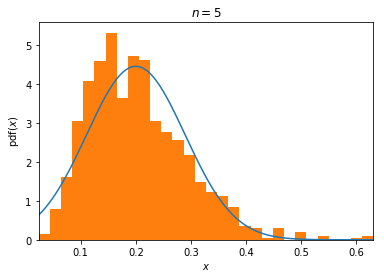

In [7]:
n = 5
mu = expect
sigma = sqrt(variance/n)
med = f(n) 
gauss = sts.norm(loc = mu, scale = sigma)
xplot = np.linspace(min(med), max(med), 200) 
yplot = gauss.pdf(xplot)
plt.plot(xplot, yplot, label = 'Approximated gauss distribution')
plt.hist(med, bins = 30, normed = True, label = 'f(x)')
plt.xlim(min(med), max(med))
plt.xlabel('$x$')
plt.ylabel('pdf($x$)')
plt.title('$n = 5$')
plt.show()

n = 10:

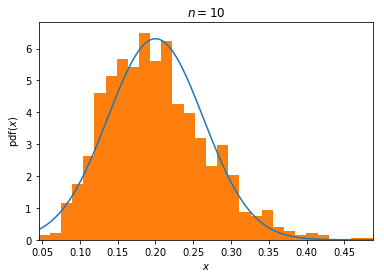

In [8]:
n = 10
mu = expect
sigma = sqrt(variance/n)
med = f(n) 
gauss = sts.norm(loc = mu, scale = sigma)
xplot = np.linspace(min(med), max(med), 200) 
yplot = gauss.pdf(xplot)
plt.plot(xplot, yplot, label = 'Approximated gauss distribution')
plt.hist(med, bins = 30, normed = True, label = 'f(x)')
plt.xlim(min(med), max(med))
plt.xlabel('$x$')
plt.ylabel('pdf($x$)')
plt.title('$n = 10$')
plt.show()

n = 50:

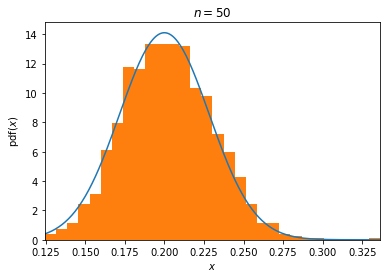

In [9]:
n = 50
mu = expect
sigma = sqrt(variance/n)
med = f(n) 
gauss = sts.norm(loc = mu, scale = sigma)
xplot = np.linspace(min(med), max(med), 200) 
yplot = gauss.pdf(xplot)
plt.plot(xplot, yplot, label = 'Approximated gauss distribution')
plt.hist(med, bins = 30, normed = True, label = 'f(x)')
plt.xlim(min(med), max(med))
plt.xlabel('$x$')
plt.ylabel('pdf($x$)')
plt.title('$n = 50$')
plt.show()

Как видно, центральная предельная теорема действительно работает, и с ростом n возрастает точность аппроксимации